This notebook simulates correlated random sales and calculates the revenue.

In [1]:
# import numpy
import numpy as np
# import matplotlib
import matplotlib.pyplot as plt
#import seaborn
import seaborn as sns
# set to plot automatically
%matplotlib inline
# set font size of charts
sns.set(font_scale=2)

First set the parameters for the simulation:
- mean sales (120,150,100)
- standard deviation of sales (10,20,5)
- correlation of sales
- price/revenue for each product (200,150,100)
- number of samples (1000)

In [2]:
# set sale means
mu=np.array([[120],[150],[100]])

In [3]:
# set sales standard deviations
std_dev=np.array([10,20,5])

In [4]:
# set sales correlations
correlation=np.array([[1,0.4,-0.6],[0.4,1,-0.2],[-0.6,-0.2,1]])

In [5]:
# set price of each product
product_revenue=np.array([200,150,100])

In [6]:
# set number of samples
samples = 1000

Simulate variables from standard normal

In [7]:
# set numpy random state so repeatable results
np.random.seed(42)
# simulate standard normal (Z1, Z2, Z3)
Z = np.random.randn(3,samples)

First, calculate the covariance matrix. This can be decomposed as $\Sigma = DRD$ where $R$ is the correlation matrix (defined above) and $D$ is the diag($\sigma_1,\sigma_2,\sigma_3$).

In [8]:
# find covariance matrix
D = np.diag(std_dev)
cov = np.dot(np.dot(D,correlation),D)

The sales can then be simulated from the 3-dimensional Cholesky decomposition. This is the lower-triangular matrix $A$ such that $\Sigma=AA^T$. With simulated sales given by $AZ + \mu$

In [9]:
# find cholesky decomposition
A = np.linalg.cholesky(cov)
# simulate correlated sales for the three products
X = np.dot(A,Z) + mu

In [10]:
# show simulation correlations close to actual correlations defined above
print('Sample correlation matrix close to actual: \n \n',np.corrcoef(X))

Sample correlation matrix close to actual: 
 
 [[ 1.          0.36202831 -0.58827603]
 [ 0.36202831  1.         -0.17903447]
 [-0.58827603 -0.17903447  1.        ]]


Revenue can then be calculated by the sum product of sales and product revenue

In [11]:
# return simulated revenue from sales
revenue=np.dot(product_revenue,X)
print('Mean revenue: ',revenue.mean())

Mean revenue:  56754.7063973


# Visualise revenue and sales

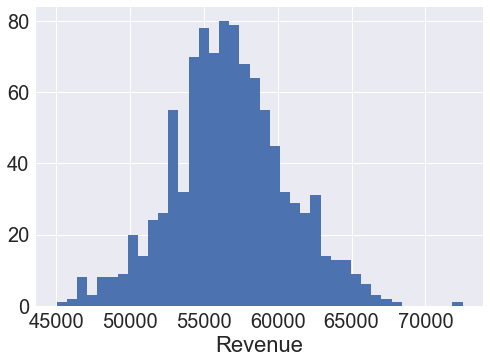

In [12]:
# plot simulated revenue
plt.hist(revenue,bins=40);
plt.xlabel('Revenue');

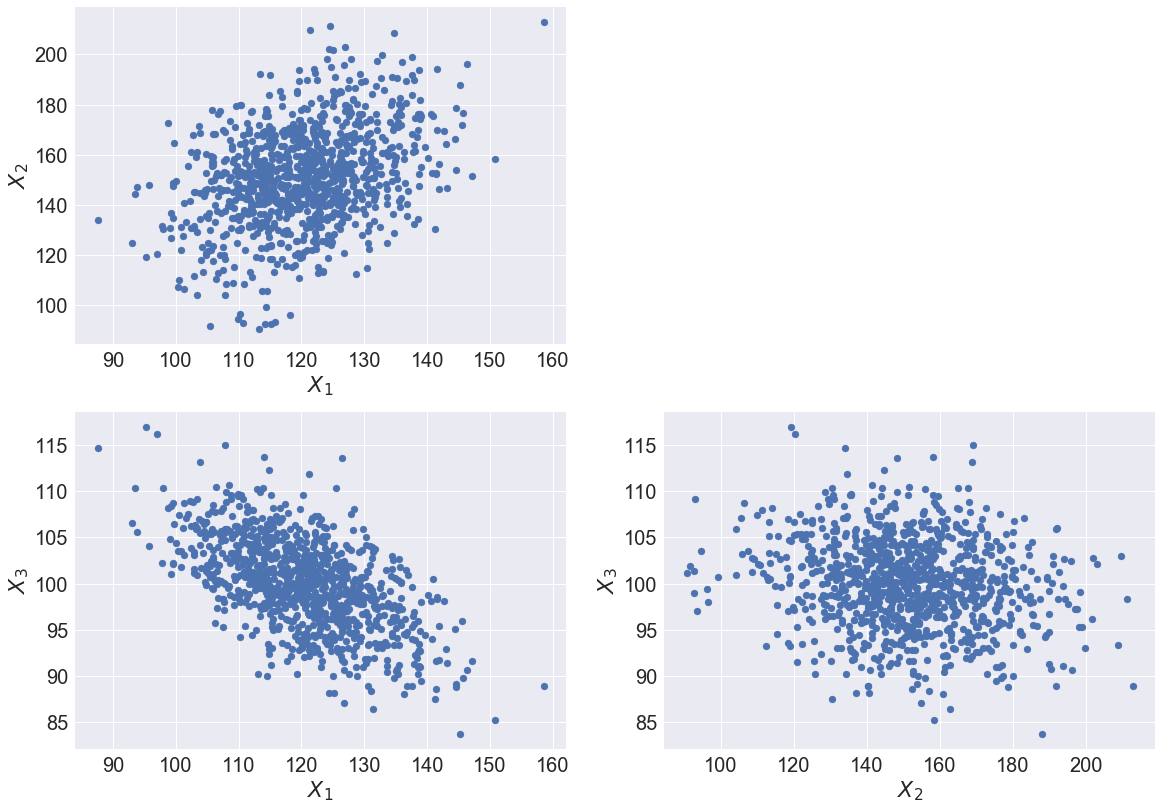

In [13]:
# plot simulated sales
plt.subplot(2,2,1);
plt.scatter(X[0], X[1]);
plt.xlabel('$X_1$');
plt.ylabel('$X_2$');

plt.subplot(2,2,3);
plt.scatter(X[0], X[2]);
plt.xlabel('$X_1$');
plt.ylabel('$X_3$');

plt.subplot(2,2,4);
plt.scatter(X[1], X[2]);
plt.xlabel('$X_2$');
plt.ylabel('$X_3$');

plt.subplots_adjust(left=None, bottom=None, right=2, top=2,wspace=None, hspace=None)